In [1]:
podstawic_parametry_czy_nie = 0;

In [2]:
def dispvar(e = dir()):
    for i in e:
        if not i.startswith('_') : print(i) 

# 🛰️ <b> <u> <font color='YELLOW'> 1. IMPORTY </font>

In [3]:
# imports
from IPython.display import display as disp
from IPython.display import Markdown as dispmd
from IPython.display import Latex as dispLtx

from sympy import symbols, cos, sin
import sympy as smp
import numpy as np

# Newtown notation for derivatives (dot notation) -> bardzo spowalnia printowanie równań
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
init_vprinting() 

# 🛰️ <b> <u> <font color='YELLOW'> 2. SYMB. RÓWNANIA MODELU </font>

In [4]:
# Symbols
Mt, Jt, mr, L, Lc, g, gamma, D, Ff = smp.symbols('M_t J_t m_r L L_c g gamma D F_f')
t = smp.symbols('t')
the, x, u = smp.symbols('theta, x, u', cls=smp.Function)
the = the(t)
x = x(t)
u = u(t)
Dthe = smp.diff(the, t)
DDthe = smp.diff(the, t, 2)
Dx = smp.diff(x, t)
DDx = smp.diff(x, t, 2)

# silnik
alpha = smp.symbols('alpha') 
beta = smp.symbols('beta')
v = smp.symbols('v')

a1 = smp.Matrix([ 
    [Mt, mr*L*cos(the)],
    [mr*L*cos(the), Jt]
])
a2  = smp.Matrix([
    [DDx],
    [DDthe]
])
a3 = smp.Matrix([
    [Ff - L*mr*sin(the)*Dthe**2],
    [gamma*Dthe - mr*g*L*sin(the)]
]) 
a4 = smp.Matrix([
    [-u],
    [0]
])
a5 = smp.Matrix([
    [-D*cos(the)],
    [-Lc*D]
])

DDx_ss, DDthe_ss = a1.inv() * (-a3 - a4 - a5)
DDx_ss = DDx_ss.simplify()
DDthe_ss = DDthe_ss.simplify()

x1, x2, x3, x4 = smp.symbols('x_1 x_2 x_3 x_4', cls=smp.Function)
x1 = x1(t); x2 = x2(t); x3 = x3(t); x4 = x4(t) 

# ☄️<b> <u>  <font color='YELLOW'> 3. PARAMETRY MODELU

In [5]:
M = 0.815
mp = 0.21
mc = 0
Lp = 0.305
Lc = 2*Lp
g = 9.8145
mr = mp+mc
Mt = M+mr
L = (Lp*mp + Lc*mc) / mr
Jcm = Lp**2 / mr * ( 4/3 * mr*(3 * mc + mp) - (2*mc + mp)**2 )
Jt = Jcm + mr*L**2
gamma = 0.1
b_lepkie = 2.1
b_stribeck = 3
miu_c      = 0.04287
miu_s      = 0.0861
vs         = 0.105
i          = 2
delta      = 400

alpha = 1.719
beta = 7.682

params_visc_values = [M, mc, mp, Lp, Lc, g, b_lepkie, gamma, mr, Mt, L, Jcm, Jt]
params_stri_values = [M, mc, mp, Lp, Lc, g, b_stribeck, gamma, mr, Mt, L, Jcm, Jt, miu_c, miu_s, vs, i]

In [6]:
M, mc, mp, Lp, Lc, g, b_lepkie, gamma, mr, Mt, L, Jcm, Jt = smp.symbols('M m_c m_p L_p L_c g b gamma m_r M_t L J_{cm} J_t')
# params lepkie
params_visc = [M, mc, mp, Lp, Lc, g, b_lepkie, gamma, mr, Mt, L, Jcm, Jt]

M, mc, mp, Lp, Lc, g, b_stribeck, gamma, mr, Mt, L, Jcm, Jt, miu_c, miu_s, vs, i = smp.symbols('M m_c m_p L_p L_c g b gamma m_r M_t L J_{cm} J_t mu_c mu_s v_s i')
# params Stribeck
params_stri = [M, mc, mp, Lp, Lc, g, b_stribeck, gamma, mr, Mt, L, Jcm, Jt, miu_c, miu_s, vs, i]

In [7]:
# to jest ciekawe że wartości zmiennych w tablicy params_visc_values zostały do niej
# skopiowane dopiero gdy nadpisało się zmienne które były w tej tablicy
id(M) == id(params_stri_values[0])

False

In [8]:
# trzeba sie upewnić czy napewno te list się nie ponadpisywały 
disp(params_stri)
disp(params_stri_values)

# na wszelki wypadek trzeba sprawdzić
# powinno być: true, true
disp(len(params_visc) == len(params_visc_values))
disp(len(params_stri) == len(params_stri_values))

True

True

# ☄️<b> <u>  <font color='YELLOW'> 4. RÓWNANIA STANU

'State vector.'

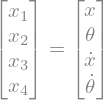

'State equations'

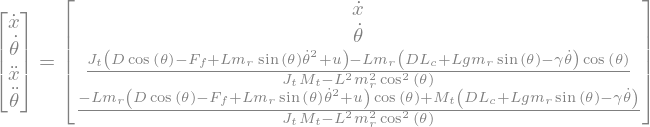

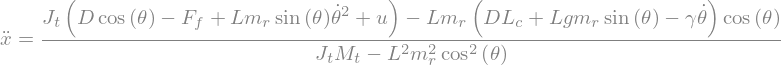

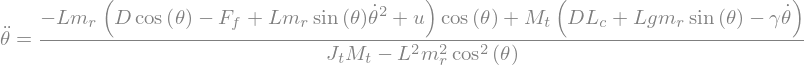

state_equations w x-ach


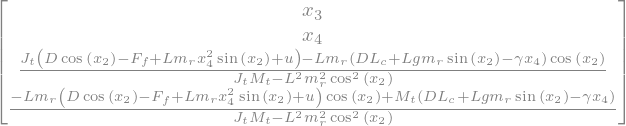

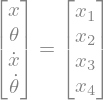

'Tarcie lepkie'

'Tarcie model Stribeck-a'

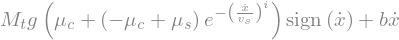

'Tarcie model Stribeck-a bez signum'

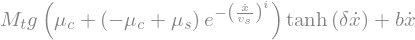

In [9]:
# state vector, x1 x2 x3 x4
state_vec = smp.Matrix([
    [x1],
    [x2],
    [x3],
    [x4]
])
# state vector, x theta ...
state_vec_noraml = smp.Matrix([
    [x],
    [the],
    [Dx],
    [Dthe]
])
disp('State vector.')
disp( smp.Eq(state_vec, state_vec_noraml) )

state_vec_diff = state_vec.diff(t)
state_vec_noraml_diff = state_vec_noraml.diff(t)
state_equations_normal = smp.Matrix([
    [Dx],
    [Dthe],
    [DDx_ss],
    [DDthe_ss]
])

disp('State equations')
disp( smp.Eq( state_vec_noraml_diff, state_equations_normal ) )
disp( smp.Eq( DDx, DDx_ss ) )
disp( smp.Eq( DDthe, DDthe_ss ) )
state_equations = state_equations_normal.subs([(Dx, x3), (Dthe, x4), (x, x1), (the, x2)])

print('state_equations w x-ach')
disp(state_equations)
disp( smp.Eq( state_vec_noraml, state_vec ) )   

# TARCIA
# viscous friction
b = smp.symbols('b')
Ff_b = b*Dx

# stribeck friction
uc, us, vs, i = smp.symbols('mu_c mu_s v_s i')
Ff_s = (uc + (us - uc) * smp.exp(-(Dx/vs)**i)) * Mt*g * smp.sign(Dx) + b*Dx

# stribeck friction, sign(Dx) ->np.-> tanh(500*Dx)
d = d = smp.Symbol('delta')
uc, us, vs, i = smp.symbols('mu_c mu_s v_s i')
Ff_s2 = (uc + (us - uc) * smp.exp(-(Dx/vs)**i)) * Mt*g * smp.tanh(d*Dx) + b*Dx

disp('Tarcie lepkie')
disp(Ff_b)

disp('Tarcie model Stribeck-a')
disp(Ff_s)

disp('Tarcie model Stribeck-a bez signum')
disp(Ff_s2)

In [10]:
Ff_s2 = Ff_s2.subs(d, 400)
Ff_s2 = Ff_s2.subs(i, 2)

In [11]:
# podstawienie tarcia
state_equations_visc = state_equations.subs(Ff, Ff_b).subs(Dx, x3)
state_equations_stri = state_equations.subs(Ff, Ff_s2).subs(Dx, x3)

# ☄️ <b> <u> <font color='YELLOW'> 5. LINEARYZACJA </font>

## <font color='yellow'> 5.1 PUNKTY PRACY

<font size='4' color='#c512e0'> <b> Równania stanu są: </b> </font>   
<font color='#e6a819' size='4'> $\dot{\boldsymbol{x}} = \boldsymbol{f}(\boldsymbol{x}, u, D)$ </font>

<font color='orange'>
punkty pracy, g-góra, d-dół  
<font size="4"> 
$S_{g/d} = (\theta_0,\ \dot{x}_0,\ \dot{\theta}_0,\ \ddot{x}_0,\ \ddot{\theta}_0,\ u_0,\ D_0)$  
    
---
górne położenie:   
$S_g = (\ 0,\ 0,\ 0,\ 0,\ 0,\ 0,\ 0\ )$   

Przyrostowe zmienne = oryginalne zmienne  
$\Delta \theta = \theta - 0$  
...   
$\Delta D = D - 0$
    
---
dolne położenie:   
$S_d = (\ \pi,\ 0,\ 0,\ 0,\ 0,\ 0,\ 0\ )$   
  
Tylko $\Delta \theta$ jest inna    
$\Delta \theta = \theta - \pi$  
...   
$\Delta D = D - 0$

## <font color='yellow'> 5.2 OBLICZENIA DALEJ

In [12]:
state_vec_noraml.transpose()

In [13]:
# punkty pracy
Sg = [0, 0, 0, 0, 0, 0]
Sd = [0, np.pi, 0, 0, 0, 0]
# punkt pracy symbolicznie - uzyty do podstawienia punktu pracy z wart. numerycznymi
S0 = [x1, x2, x3, x4, u, D]

In [14]:
# zmienne przyrostowe
D_u, D_D = smp.symbols(r'\Delta{u} \Delta{D}')

D_x1, D_x2, D_x3, D_x4 = smp.symbols(r'\Delta{x_1} \Delta{x_2} \Delta{x_3} \Delta{x_4}')

# kolejność zmiennych przyrostowych musi być taka sama jak kolejność symboli w punkcie pracy
zmienne_przyrostowe = [D_x1, D_x2, D_x3, D_x4, D_u, D_D]

## 🛰️ <font color='yellow'> 5.3 TARCIE LEPKI </font>

### <b> <font color='orange'> 5.3.1 T. lepkie, górne położenie </font>

In [15]:
# do podstawienia symboli z punktu pracy
symb_val_dict = dict(zip(S0, Sg))

In [16]:
df_dx = state_equations_visc.jacobian(state_vec)
df_du = state_equations_visc.jacobian([u])
df_dD = state_equations_visc.jacobian([D])

In [17]:
A_v_g = df_dx.subs(symb_val_dict)
B_v_g = df_du.subs(symb_val_dict)
H_v_g = df_dD.subs(symb_val_dict)

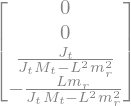

In [18]:
B_v_g

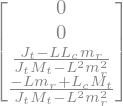

In [34]:
H_v_g

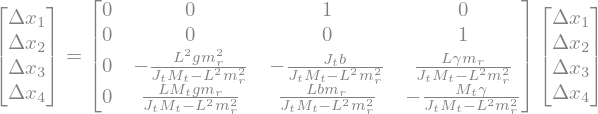

In [19]:
state_vec_przyrostowe = smp.Matrix([[D_x1], [D_x2], [D_x3], [D_x4]])
ROWNANIE_STANU = smp.Eq(state_vec_przyrostowe, smp.MatMul(A_v_g, state_vec_przyrostowe, evaluate=False), evaluate=False)
ROWNANIE_STANU

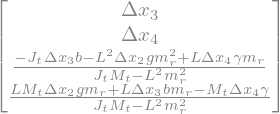

In [20]:
smp.MatMul(A_v_g, state_vec_przyrostowe).doit().simplify()

### <b> <font color='orange'> 5.3.2 T. lepkie, dolne położenie </font>

In [21]:
symb_val_dict = dict(zip(S0, Sd))

In [22]:
A_v_d = df_dx.subs(symb_val_dict)
A_v_d.simplify()
B_v_d = df_du.subs(symb_val_dict)
H_v_d = df_dD.subs(symb_val_dict)

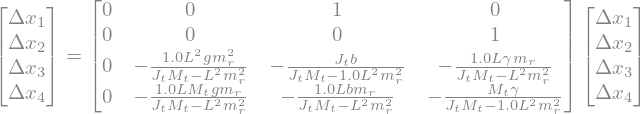

In [23]:
state_vec_przyrostowe = smp.Matrix([[D_x1], [D_x2], [D_x3], [D_x4]])

ROWNANIE_STANU = smp.Eq(state_vec_przyrostowe,
                        smp.MatMul(A_v_d, state_vec_przyrostowe, evaluate=False),
                        evaluate=False)
ROWNANIE_STANU

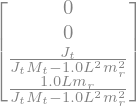

In [35]:
B_v_d

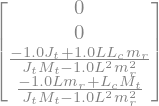

In [36]:
H_v_d

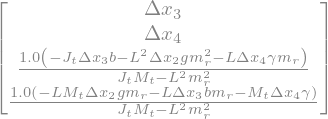

In [24]:
smp.MatMul(A_v_d, state_vec_przyrostowe).doit().simplify()

## 🛰️ <font color='yellow'> 5.4 TARCIE STRIBECKA </font>

### <b> <font color='orange'> 5.4.1 T. stribecka, górne położenie </font>

In [25]:
symb_val_dict = dict(zip(S0, Sg))

In [26]:
state_equations_stri.subs(i, 2)
df_dx = state_equations_stri.jacobian(state_vec)
df_du = state_equations_stri.jacobian([u])
df_dD = state_equations_stri.jacobian([D])

In [27]:
A_s_g = df_dx.subs(symb_val_dict)
B_s_g = df_du.subs(symb_val_dict)
H_s_g = df_dD.subs(symb_val_dict)

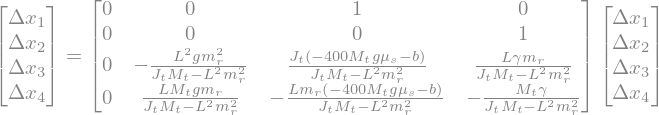

In [28]:
state_vec_przyrostowe = smp.Matrix([[D_x1], [D_x2], [D_x3], [D_x4]])
ROWNANIE_STANU = smp.Eq(state_vec_przyrostowe, smp.MatMul(A_s_g, state_vec_przyrostowe, evaluate=False), evaluate=False)
ROWNANIE_STANU

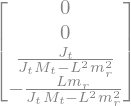

In [37]:
B_s_g

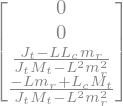

In [38]:
H_s_g

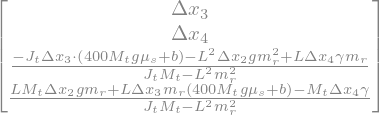

In [29]:
smp.MatMul(A_s_g, state_vec_przyrostowe).doit().simplify()

### <b> <font color='orange'> 5.4.2 T. stribecka, dolne położenie </font>

In [30]:
symb_val_dict = dict(zip(S0, Sd))

In [31]:
A_s_d = df_dx.subs(symb_val_dict)
B_s_d = df_du.subs(symb_val_dict)
H_s_d = df_dD.subs(symb_val_dict)
A_s_d.simplify()

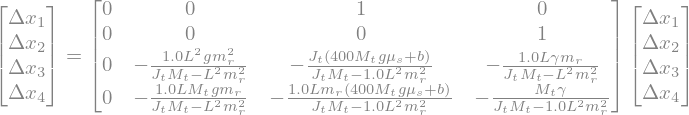

In [39]:
state_vec_przyrostowe = smp.Matrix([[D_x1], [D_x2], [D_x3], [D_x4]])
ROWNANIE_STANU = smp.Eq(state_vec_przyrostowe, smp.MatMul(A_s_d, state_vec_przyrostowe, evaluate=False), evaluate=False)
ROWNANIE_STANU

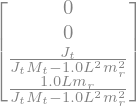

In [40]:
B_s_d

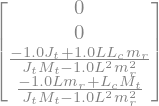

In [41]:
H_s_d

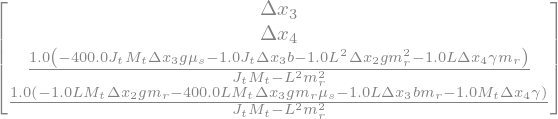

In [33]:
smp.MatMul(A_s_d, state_vec_przyrostowe).doit().simplify()